In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

In [20]:
bias = 100

X, y, coef = make_regression(n_samples=1000, n_features=5, bias=bias, coef=True, noise=10, random_state=42)

In [21]:
coef, bias

(array([28.62798621, 46.07121713, 16.82365791, 24.74629812, 18.99347437]), 100)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()

In [24]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
model.coef_, model.intercept_

(array([28.05749028, 45.94154566, 16.61187941, 24.53193249, 19.36893323]),
 99.3828533985921)

In [26]:
class CustomLinearRegression:
    
    def __init__(self, lr=.01):
        self.__lr = lr
        
    def fit(self, X, y):
        self.__X = X
        self.__y = y
        
        self.coef_ = np.random.randn(X.shape[1])
        self.intercept_ = np.random.random()
        
        errors = []
        
        for k in range(20):
            self.gradient_decend()
            errors.append(self.error())
            
        return errors
            
    def gradient_decend(self):
        delta_coef, delta_bias = self.gradient()
        
        self.coef_ += delta_coef
        self.intercept_ += delta_bias
        
#         print(self.coef_, self.intercept_)
        
    def gradient(self):
        yh = self.hypo(self.__X)
        
        diff = (yh - self.__y.reshape(-1, 1))
        
        del_err_coef = (np.dot(diff.T, self.__X)).flatten() / len(yh)
        del_err_inter = (diff).mean()
        
        return -del_err_coef*self.__lr, -del_err_inter*self.__lr
        
    def hypo(self, X):
        mx = np.sum(X * self.coef_, axis=1, keepdims=True)
        return mx + self.intercept_
    
    def error(self):
        yh = self.hypo(self.__X)
        diff = (yh - self.__y.reshape(-1, 1))
        return (diff ** 2).mean()
        
    

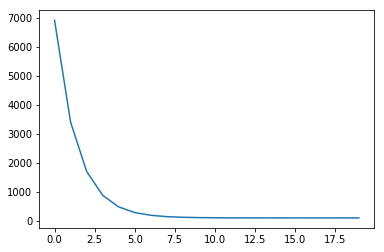

In [27]:
model = CustomLinearRegression(lr=.3)
errs = model.fit(X, y)

plt.figure()
plt.plot(errs)

In [28]:
model.coef_

array([28.01082755, 45.91210258, 16.61193227, 24.52976512, 19.34272123])

In [29]:
coef

array([28.62798621, 46.07121713, 16.82365791, 24.74629812, 18.99347437])

In [31]:
from sklearn.datasets import load_boston

In [35]:
d = load_boston()

In [38]:
X, y = d.data, d.target

In [56]:
model = LinearRegression()

In [57]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
model.coef_

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

In [59]:
model.intercept_

36.49110328036103

In [64]:
model.predict(X[:10])

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232,
       25.25940048, 23.00433994, 19.5347558 , 11.51696539, 18.91981483])

In [65]:
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [66]:
len(X)

506

In [67]:
X.shape[1]

13